<a href="https://colab.research.google.com/github/mzolneczko/DSP_lab4_20251220/blob/main/DSP_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

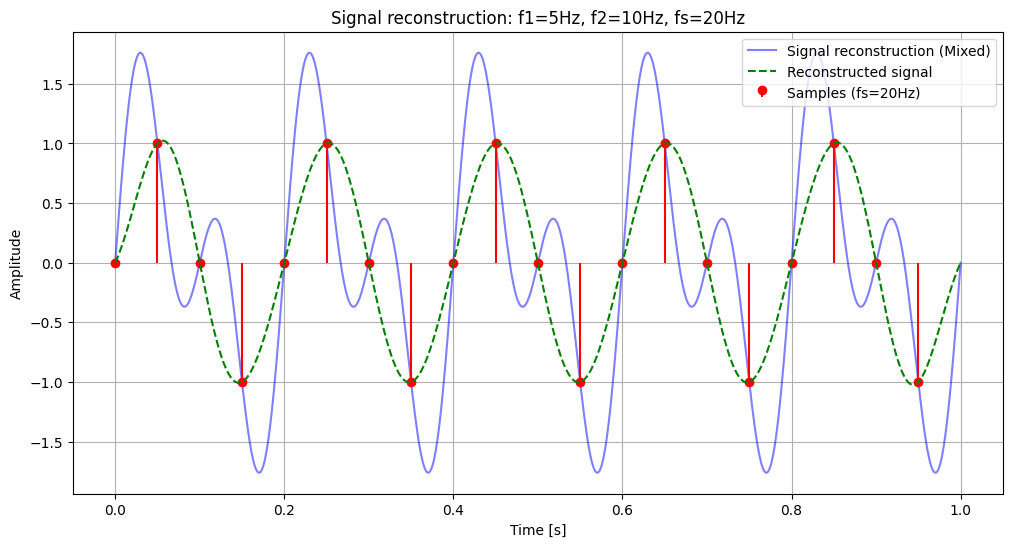

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f1 = 5
f2 = 10
fs = 20

t_continuous = np.linspace(0, 1, 1000)
signal_continuous = np.sin(2 * np.pi * f1 * t_continuous) + np.sin(2 * np.pi * f2 * t_continuous)

t_sampled = np.arange(0, 1, 1/fs)
samples = np.sin(2 * np.pi * f1 * t_sampled) + np.sin(2 * np.pi * f2 * t_sampled)

def reconstruct_signal(t_fine, t_samples, samples):
    fs = 1.0 / (t_samples[1] - t_samples[0])
    reconstruction = np.zeros_like(t_fine)
    for n, sample in enumerate(samples):
        reconstruction += sample * np.sinc(fs * (t_fine - t_samples[n]))
    return reconstruction

signal_reconstructed = reconstruct_signal(t_continuous, t_sampled, samples)

plt.figure(figsize=(12, 6))
plt.plot(t_continuous, signal_continuous, label='Signal reconstruction (Mixed)', color='blue', alpha=0.5)
plt.stem(t_sampled, samples, 'r', markerfmt='ro', label='Samples (fs=20Hz)', basefmt=" ")
plt.plot(t_continuous, signal_reconstructed, '--', label='Reconstructed signal', color='green')
plt.title('Signal reconstruction: f1=5Hz, f2=10Hz, fs=20Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [2]:
import numpy as np
from scipy.fftpack import dct, idct

signal = np.array([2, 4, 6, 8, 10, 12])
thresholds = [1, 5, 10]

def analyze_compression(signal, threshold):
    dct_coeffs = dct(signal, norm='ortho')

    compressed_coeffs = np.where(np.abs(dct_coeffs) < threshold, 0, dct_coeffs)

    non_zero = np.count_nonzero(compressed_coeffs)
    compression_ratio = (len(signal) - non_zero) / len(signal)

    reconstructed = idct(compressed_coeffs, norm='ortho')

    mse = np.mean((signal - reconstructed)**2)

    return compression_ratio, mse

print(f"{'Threshold':<10} | {'Compression level':<20} | {'Distortion (MSE)':<20}")
print("-" * 55)

for th in thresholds:
    ratio, error = analyze_compression(signal, th)
    print(f"{th:<10} | {ratio:<20.2%} | {error:<20.4f}")

Threshold  | Compression level    | Distortion (MSE)    
-------------------------------------------------------
1          | 66.67%               | 0.1154              
5          | 66.67%               | 0.1154              
10         | 83.33%               | 11.6667             
